In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Folder and Data file

In [2]:
root_folder = "/content/drive/MyDrive/ABSA work/codes/deberta/results/"

In [3]:
import os

def list_files_in_subfolders(root_folder):
    file_list = []
    for root, _, files in os.walk(root_folder):
        for file in files:
            # Get the file name without extension
            if file.lower().endswith('.csv'):
                file_name = os.path.splitext(file)[0]
                # csv_file_list.append(file_name)
                file_list.append(file_name)
    return file_list

# Function for Reports

##String to List


In [4]:
import ast
def convert_string_to_list(input_string):
  if '[' in input_string:
    return ast.literal_eval(input_string)
  else:
    # ',' in input_string:
    required_output = [word.strip() for word in input_string.split(',')]
    return required_output
  # else:
  #   required_output = [word.strip() for word in input_string.split(',')]
  #   return input_string




In [5]:
# # Apply lowercase to 'Polarity' column
# df['Sentiment'] = df['Sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# # Apply string conversion to 'Polarity' column
# df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
# df['deberta'] = df['deberta'].apply(convert_string_to_list)

In [6]:
if (type(["HEllo"]) is list):
  print("hello")

hello


## Accuracy function

In [7]:
import re
# Function to calculate accuracy between "sentiment" and "deberta" lists
def calculate_accuracy(sentiments, predicted_sentiments):
    correct_predictions = 0.0
    total_predictions = 0.0
    predictions_list=[]
    sentiments_list=[]
    for sentiment, predicted_sentiment in zip(sentiments, predicted_sentiments):
        # print(type(sentiment), type(deberta_sentiment))
        total_predictions += len(sentiment)
        # print(type(sentiment), type(predicted_sentiment))
        for s, d in zip(sentiment, predicted_sentiment):
            cleaned_string = re.sub(r'[^\w\s]', '', d)
            # Print the cleaned string
            # print(s, cleaned_string)
            sentiments_list.append(s)
            predictions_list.append(cleaned_string)
            print(s,"      ", d)
            if s == d:
                correct_predictions += 1
            # else:
            #    print(sentiment, predicted_sentiment)

    accuracy = correct_predictions / total_predictions
    return accuracy, sentiments_list, predictions_list


In [8]:
import re
# Function to calculate accuracy between "sentiment" and "deberta" lists
def calculate_accuracy_single(sentiments, predicted_sentiments):
    correct_predictions = 0.0
    total_predictions = 0.0
    predictions_list=[]
    sentiments_list=[]
    for s, d in zip(sentiments, predicted_sentiments):
        total_predictions += 1
        cleaned_string = re.sub(r'[^\w\s]', '', d)
        # print(s, cleaned_string)
        sentiments_list.append(s)
        predictions_list.append(cleaned_string)
        print(s,"      ", d)
        if s == d:
            correct_predictions += 1
        # else:
        #    print(sentiment, predicted_sentiment)

    accuracy = correct_predictions / total_predictions
    return accuracy, sentiments_list, predictions_list


## Classificaiton Report

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate classification report which includes precision, recall, and f1-score per class
def save_report(actual_labels, predicted_labels, filename, title):
  class_report = classification_report(actual_labels, predicted_labels)

  print("\nClassification Report:")
  print(class_report)
  with open(filename+'_classification_report' + '.txt', 'w') as f:
      f.write(class_report)
  print("Classification report saved to 'classification_report_" + title + ".txt'")

## Confusion matrix

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
def plot_confusion_matrix(actual_labels, predicted_labels, filename, title):
  # Get unique class labels
  class_labels = list(set(actual_labels))

  # Create confusion matrix
  conf_matrix = confusion_matrix(actual_labels, predicted_labels, labels=class_labels)

  # Plot the confusion matrix using Seaborn
  plt.figure(figsize=(6, 5))
  sns.set(font_scale=1.0)
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
              xticklabels=class_labels, yticklabels=class_labels, cbar=True)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"Confusion Matrix for {title}")
  plt.tight_layout()
  plt.savefig(filename+".png")
  plt.show()


## Save results in CSV

In [11]:
def save_results( all_true_labels, all_predicted_labels, folder_name, data, title, test_acc, task="ATSA"):
  # Calculate precision, recall, and F-score
    precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
    recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
    f_score = f1_score(all_true_labels, all_predicted_labels, average='weighted')
    if 'acsa' in title or 'category' in title or 'sentihood' in title.lower():
      task='ACSA'
    data_to_append = {
        'dataset_name': data+title,
        'task':task,
        'test_accuracy': round(test_acc, 2),
        'f_score': round(f_score, 2),
        'recall': round(recall,2),
        'precision': round(precision,2)
    }

    csv_file = folder_name+"Results_deberta.csv"  # Replace with your CSV file name

    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        df = pd.DataFrame(columns=['dataset_name', 'task', 'test_accuracy', 'f_score', 'precision', 'recall'])

    df = df.append(data_to_append, ignore_index=True)
    df.to_csv(csv_file, index=False)



# DOTSA Dataset

In [12]:
data = "dotsa/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
list_files


['new_Books_test',
 'new_Restaurant_test',
 'new_Clothing_test',
 'new_Hotels_test']

In [13]:
filename = data_folder+list_files[0]
csv_file = filename+".csv"
import pandas as pd
df = pd.read_csv(csv_file)
print(len(df))
df.head(10)


143


,Text,Aspect,Sentiment,deberta
0,This story is one of too many heartbreaking st...,story,Mixed,Negative
1,Good Faye Kellerman ! ! ! She manages to keep ...,"Faye Kellerman, characters, it","Positive, Positive, Positive","Positive, Positive, Positive"
2,Good book on cancer -- a little longer than I ...,book,Positive,Positive
3,"An ultimately moving book that details , somet...",book,Positive,Positive
4,"Wow , this was a real tear jerker - and unfort...","way, it, this","Positive, Positive, Negative","Positive, Positive, Positive"
5,"Seriously , something 's wrong when you 're ro...","prose, book III in the Soldier Son Trilogy--Ho...","Positive, Positive, Positive, Mixed, Negative,...","Negative, Negative, Negative, Negative, Negati..."
6,Damaged . The Hearbreaking True sory of a Forg...,sory,Mixed,Positive
7,Gift,Gift,Positive,Negative
8,The story is horrifying . Cathy Glass is a sup...,"story, Cathy Glass","Negative, Positive","Negative, Positive"
9,Robin Hobb I think has a severe love-hate rela...,"stories, Robin Hobb","Positive, Positive","Negative, Negative"


In [14]:
# Check for null values in any column of each row
rows_with_null = df[df.isnull().any(axis=1)]
print(len(rows_with_null))
# rows_with_null

0


## Call Accuracy and report in loop

Null values are:  0 in  new_Books_test
<class 'list'>
mixed        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        positive
positive        negative
positive        negative
positive        negative
mixed        negative
negative        negative
positive        negative
negative        negative
mixed        negative
mixed        positive
positive        negative
negative        negative
positive        positive
positive        negative
positive        negative
positive        positive
positive        negative
positive        positive
positive        positive
positive        positive
negative        positive
positive        positive
positive        negative
positive        positive
negative        negative
negative        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        50
    negative       0.52      0.88      0.65        73
    positive       0.86      0.86      0.86       245

    accuracy                           0.75       368
   macro avg       0.46      0.58      0.50       368
weighted avg       0.68      0.75      0.70       368

Classification report saved to 'classification_report_Books_test.txt'


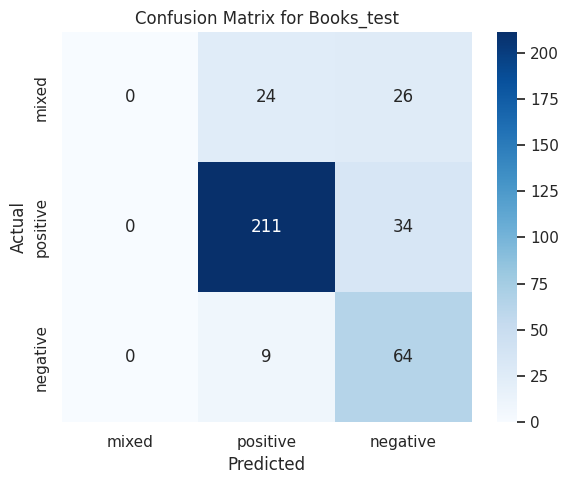

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Restaurant_test
<class 'list'>
positive        positive
mixed        positive
positive        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
negative        negative
positive        positive
positive        positive
mixed        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        negative
positive        positive
positive        positive
positive        negative
negative        negative
positive        positive
negative        negative
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive        positi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        62
    negative       0.66      0.79      0.72       106
    positive       0.88      0.95      0.91       514

    accuracy                           0.84       682
   macro avg       0.51      0.58      0.54       682
weighted avg       0.76      0.84      0.80       682

Classification report saved to 'classification_report_Restaurant_test.txt'


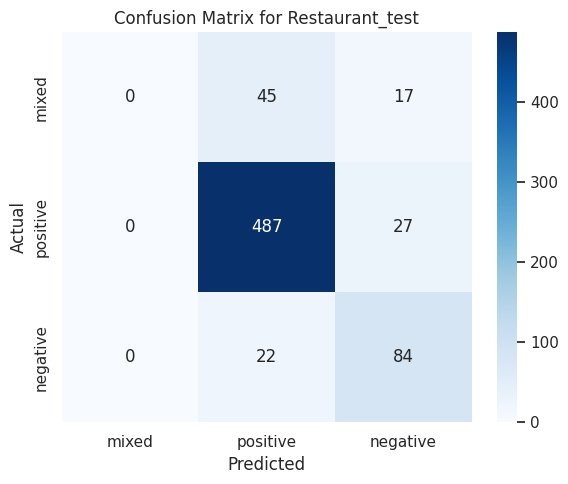

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Clothing_test
<class 'list'>
negative        negative
positive        positive
positive        positive
mixed        negative
positive        positive
mixed        positive
positive        positive
mixed        positive
positive        positive
positive        positive
negative        negative
mixed        negative
positive        positive
positive        positive
positive        positive
negative        negative
mixed        positive
negative        negative
mixed        positive
mixed        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
mixed        positive
positive        positive
positive        positive
positive        p

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_Clothing_test.txt'


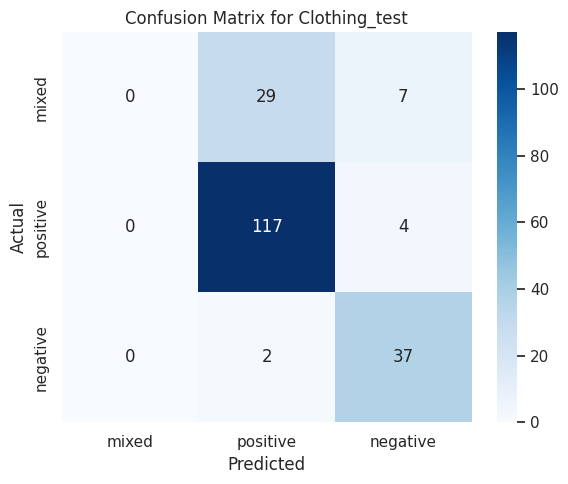

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Hotels_test
<class 'list'>
positive        positive
positive        positive
positive        positive
mixed        negative
negative        negative
positive        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
mixed        positive
negative        negative
mixed        positive
positive        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
mixed        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positiv

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_Hotels_test.txt'


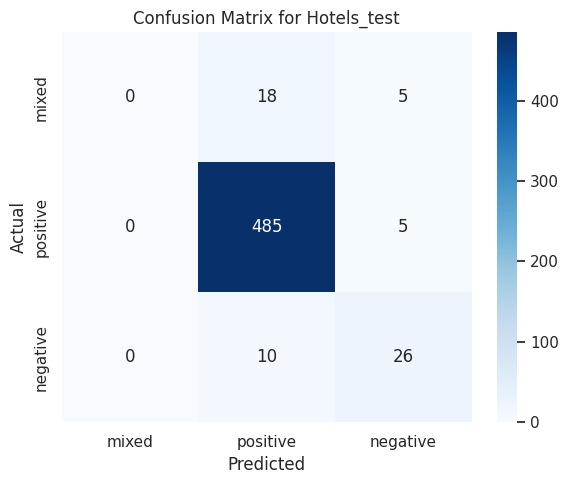

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [15]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  df['deberta'] = df['deberta'].apply(convert_string_to_list)
  print(type(df["Sentiment"][0]) )
  if type(df["Sentiment"][1]) is list:
    accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df["deberta"])
  else:
    accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["Sentiment"], df["deberta"])
  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i][4:])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i][4:])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i][4:], test_acc=accuracy )

# MAMS Dataset

In [16]:
data = "MAMS/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['ACSA_test', 'ATSA_test']

Null values are:  0 in  ACSA_test
The file is ACSA_test
neutral        neutral
negative        negative
positive        positive
negative        negative
negative        negative
neutral        neutral
negative        neutral
neutral        neutral
neutral        neutral
negative        negative
negative        negative
neutral        neutral
negative        negative
neutral        neutral
positive        positive
negative        negative
negative        negative
neutral        neutral
negative        negative
negative        negative
neutral        neutral
neutral        neutral
neutral        neutral
positive        neutral
negative        negative
neutral        neutral
negative        negative
neutral        neutral
negative        negative
neutral        negative
neutral        neutral
positive        neutral
positive        neutral
neutral        neutral
neutral        neutral
negative        negative
neutral        neutral
positive        positive
positive        positive
neutra

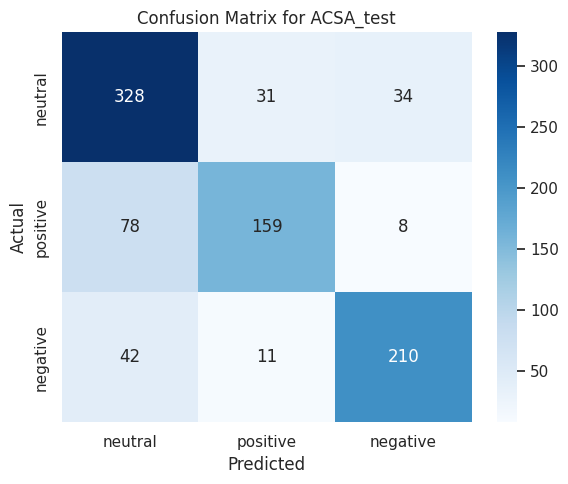

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  ATSA_test
The file is ATSA_test
neutral        positive
positive        positive
positive        positive
neutral        negative
negative        negative
neutral        neutral
positive        positive
neutral        neutral
negative        negative
neutral        neutral
neutral        neutral
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
negative        negative
neutral        neutral
positive        positive
positive        positive
neutral        positive
positive        positive
neutral        neutral
neutral        neutral
neutral        neutral
neutral        neutral
neutral        neutral
positive        neutral
positive        positive
neutral        neutral
negative        negative
positive        positive
neutral        neutral
neutral        neutral
positive        positive
positive        positive
neutral        neutral
neutral        neutral
negative        positive
neu

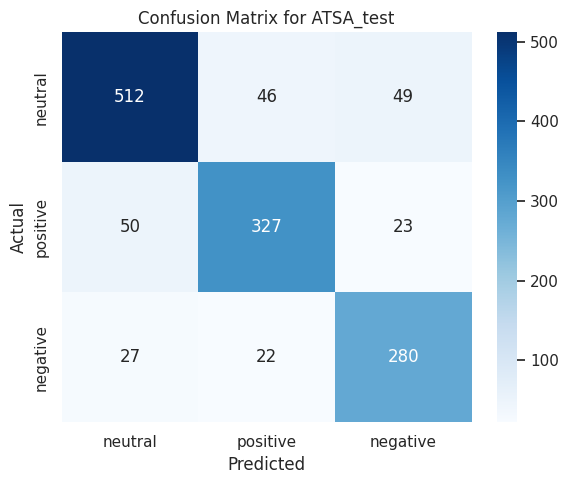

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [17]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['polarity'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['polarity'] = df['polarity'].apply(convert_string_to_list)
  df['deberta'] = df['deberta'].apply(convert_string_to_list)
  print(f"The file is {list_files[i]}\n============================" )
  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["polarity"], df["deberta"])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )


#Yaso Dataset

In [18]:
data = "YASO/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['TSA-MD_test', 'YASO_test']

Null values are:  21 in  TSA-MD_test
negative        positive
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
negative        negative
negative        negative
positive        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
positive        positive
negative        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive     

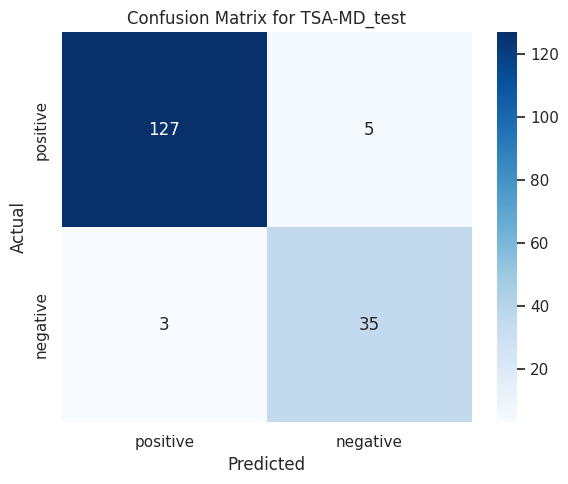

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  21 in  YASO_test
negative        positive
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
negative        negative
negative        negative
positive        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
positive        positive
negative        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive       

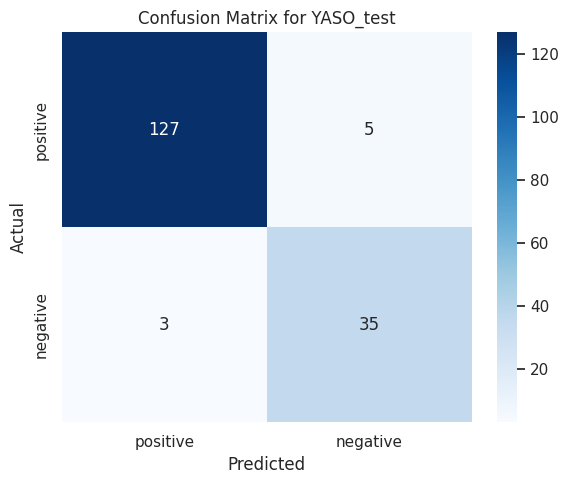

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [19]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  df.dropna(subset='deberta', inplace=True)
  # Apply lowercase to 'Polarity' column
  df['sentiment'] = df['sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # # Apply string conversion to 'Polarity' column
  # df['sentiment'] = df['sentiment'].apply(convert_string_to_list)
  # df['deberta'] = df['deberta'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["sentiment"], df["deberta"])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )

#SemEval 2016

In [20]:
data = "SemEval2016/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['laptops_category_test_single',
 'restaurants_category_test_single',
 'restaurants_terms_test_single']

99
Null values are:  0 in  laptops_category_test_single
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
negative        negative
negative        negative
negative        negative
negative        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        pos

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_laptops_category_test_single.txt'


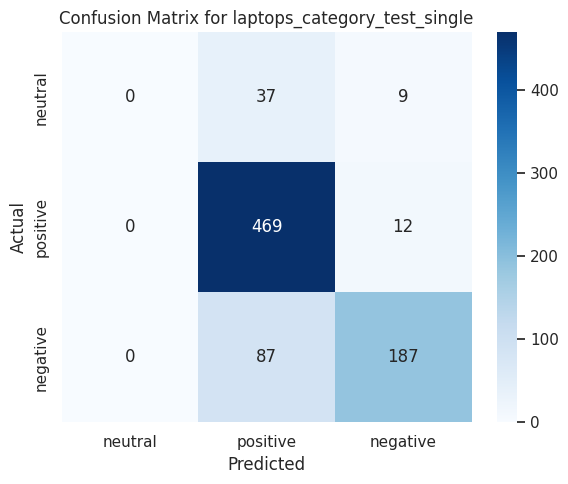

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


103
Null values are:  209 in  restaurants_category_test_single
positive        positive
positive        positive
neutral        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
negative        negative
negative        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
negative        negative
negative        negative
negative        negative
negative        positive
positive        negative
negative        positive
negative        negative
positive        negative
negative        negative
negative        negative
negative        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_restaurants_category_test_single.txt'


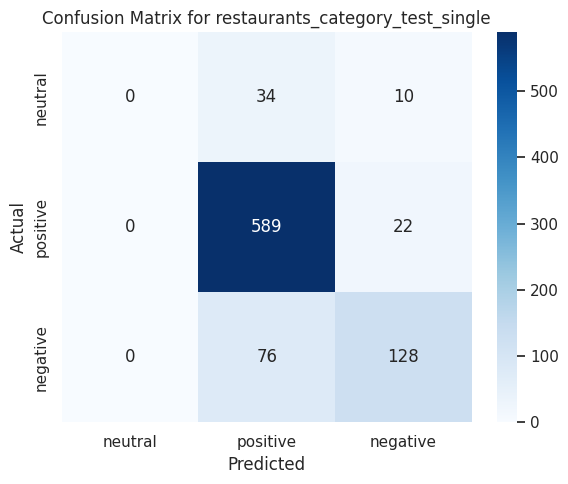

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


100
Null values are:  209 in  restaurants_terms_test_single
positive        positive
positive        positive
neutral        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
negative        negative
negative        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        negative
negative        negative
negative        positive
negative        negative
negative        negative
positive        positive
negative        negative
negative        positive
positive        negative
negative        negative
negative        negative
negative        negative
negative        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.69      0.73       204
     neutral       0.00      0.00      0.00        44
    positive       0.86      0.96      0.91       611

    accuracy                           0.85       859
   macro avg       0.55      0.55      0.55       859
weighted avg       0.80      0.85      0.82       859

Classification report saved to 'classification_report_restaurants_terms_test_single.txt'


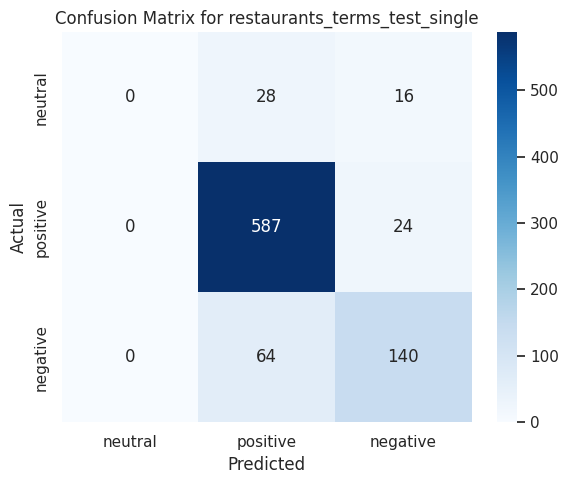

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [21]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  print(len(csv_file))
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  df.dropna(subset='deberta', inplace=True)
  # Apply lowercase to 'Polarity' column
  df['polarity'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # # Apply string conversion to 'Polarity' column
  # df['sentiment'] = df['sentiment'].apply(convert_string_to_list)
  # df['deberta'] = df['deberta'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["polarity"], df["deberta"])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )

#Sentihood

In [22]:
data = "Sentihood/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['sentihood_test_single']

90
Null values are:  0 in  sentihood_test_single
positive        positive
positive        positive
positive        positive
negative        positive
positive        positive
positive        positive
negative        positive
negative        negative
positive        negative
positive        positive
negative        negative
positive        positive
positive        positive
positive        positive
negative        negative
positive        negative
negative        negative
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
positive        positive
negative        positive
negative        positive
positive        positive
negative        negative
positive        positive
positive        positive
positive        positive
positive        negative
negative        negative
positive        positive
positive        positive
n

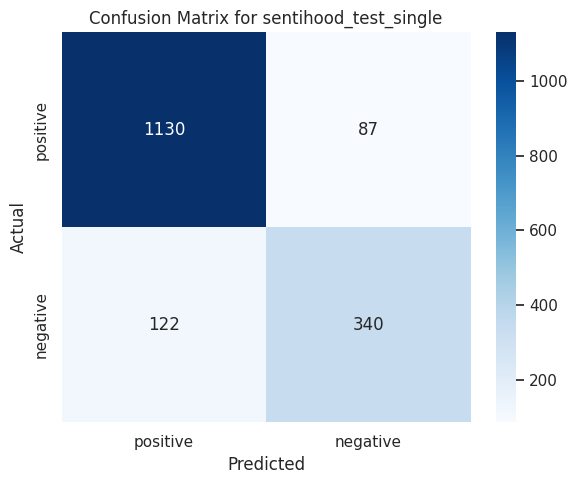

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [23]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  print(len(csv_file))
  df = pd.read_csv(csv_file)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  df.dropna(subset='deberta', inplace=True)
  # Apply lowercase to 'Polarity' column
  df['polarity'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # # Apply string conversion to 'Polarity' column
  # df['sentiment'] = df['sentiment'].apply(convert_string_to_list)
  # df['deberta'] = df['deberta'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy_single(df["polarity"], df["deberta"])

  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )